# Import Libraries


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy.stats as stats
# import statistics

from scipy import stats

from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# !conda install -c conda-forge xgboost --yes

import xgboost as xgb




# Data Loading


In [74]:
df = pd.read_csv('mail_delivery_time.csv')
df.shape

(45593, 19)

In [75]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Post_office_latitude,Post_office_longitude,Delivery_location_latitude,Delivery_location_longitude,Recieve_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,8:45:00,conditions Sandstorms,Low,0,motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,conditions Sunny,Medium,0,motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,scooter,1,No,Metropolitian,30


In [76]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Post_office_latitude',
       'Post_office_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Recieve_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_vehicle', 'multiple_deliveries',
       'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [77]:
print("Number of rows and columns of Training Dataset :", df.shape)

Number of rows and columns of Training Dataset : (45593, 19)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Post_office_latitude         45593 non-null  float64
 5   Post_office_longitude        45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Recieve_Date                 45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [79]:
#Check statistical values for fields with numerical datatype

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Post_office_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Post_office_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000
Time_taken(min),45593.0,26.294607,9.383806,10.000000,19.000000,26.000000,32.000000,54.000000


In [80]:
#Verify statistical values (using numpy) for fields that have data types other than numeric.
df.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Recieve_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_vehicle,45593,4,motorcycle,26435


**Notes:**
    
1. The Time_Orderd column contains null values.

2. Data Formatting will be necessary for Weatherconditions & Time_taken(min) column.

2. Both numerical & categorical features are present.

3. ID & Delivery_person_ID will not be used to build the model.

## ***                      Data Preprocessing***




# Data Cleaning



In [81]:
#Update Column Names. We changed two column names

def update_column_name(df_update):
    #Renaming Weatherconditions column
    df_update.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)
    df_update.rename(columns={'Time_taken(min)': 'Time_taken(hour)'},inplace=True)

update_column_name(df)
print(df.columns)


Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Post_office_latitude',
       'Post_office_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Recieve_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_vehicle', 'multiple_deliveries',
       'Festival', 'City', 'Time_taken(hour)'],
      dtype='object')


In [82]:
# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(df['Time_taken(hour)']))
outlier_indices = np.where(z_scores > 3)[0]  # Threshold set to 3 standard deviations
df_clean = df.drop(outlier_indices)

In [83]:
# Define a function to extract relevant values from a DataFrame

def extract_column_value(df_extract):
    #Extract Weather conditions
    df_extract['Weather_conditions'] = df_extract['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
    #We have to changed the Weather_conditions column. Because there were some extra insignificant values before the important data(ex: conditions Sunny)

    # Extract city code from Delivery person ID
    # Here, we use the 'str.split' method to split the 'Delivery_person_ID' column based on the string "RES"
    # We use 'expand=True' to create a new DataFrame with the split values in separate columns
    # The '[0]' at the end selects the first column, which contains the city code
    df_extract['City_code']=df['Delivery_person_ID'].str.split("RES", expand=True)[0]

extract_column_value(df)
df[['Weather_conditions','City_code']].head()





,Weather_conditions,City_code
0,Sunny,INDO
1,Stormy,BANG
2,Sandstorms,BANG
3,Sunny,COIMB
4,Cloudy,CHEN


In [84]:
## Function to drop specified columns from a DataFrame(Droping  Columns which won't be use for building model)

def drop_columns(df_drop):
    df_drop.drop(['ID','Delivery_person_ID', 'Time_Orderd','Time_Order_picked', 'Recieve_Date'],axis=1,inplace=True)
    # Drop the specified columns ('ID' and 'Delivery_person_ID') along the columns axis (axis=1)
    # inplace=True modifies the original DataFrame without the need to assign it to a new variable

print("Before No. of columns: ",df.shape[1])
drop_columns(df)
print("After No. of columns: ",df.shape[1])

Before No. of columns:  20
After No. of columns:  15


In [85]:
# Check if there are any duplicate rows in the DataFrame

if (len(df[df.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There are Duplicate values present


In [86]:
#Update datatypes

def update_datatype(df_type):

    # Convert 'Delivery_person_Age' column to float64
    df_type['Delivery_person_Age'] = df_type['Delivery_person_Age'].astype('float64')
    df_type['Delivery_person_Ratings'] = df_type['Delivery_person_Ratings'].astype('float64')
    df_type['multiple_deliveries'] = df_type['multiple_deliveries'].astype('float64')

update_datatype(df)

In [87]:
#Convert String 'NaN' to np.nan. numpy library has been used for this part

def convert_nan(df_convert):
    df_convert.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(df)

#  Note: In Python, ‘NaN’ is a string (text), while np.nan is a special floating-point value that represents “Not a Number”.
#        When we’re working with data in pandas, it’s more useful to have missing values represented as np.nan, because pandas
#        understands that this value represents missing or undefined data.
#        So, by converting ‘NaN’ strings to np.nan, we’re making our DataFrame easier to work with when performing mathematical
#        and statistical operations.

In [88]:
#Check null values

df.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
City                           1200
multiple_deliveries             993
Weather_conditions              616
Road_traffic_density            601
Festival                        228
Post_office_latitude              0
Post_office_longitude             0
Delivery_location_latitude        0
Delivery_location_longitude       0
Vehicle_condition                 0
Type_of_vehicle                   0
Time_taken(hour)                  0
City_code                         0
dtype: int64

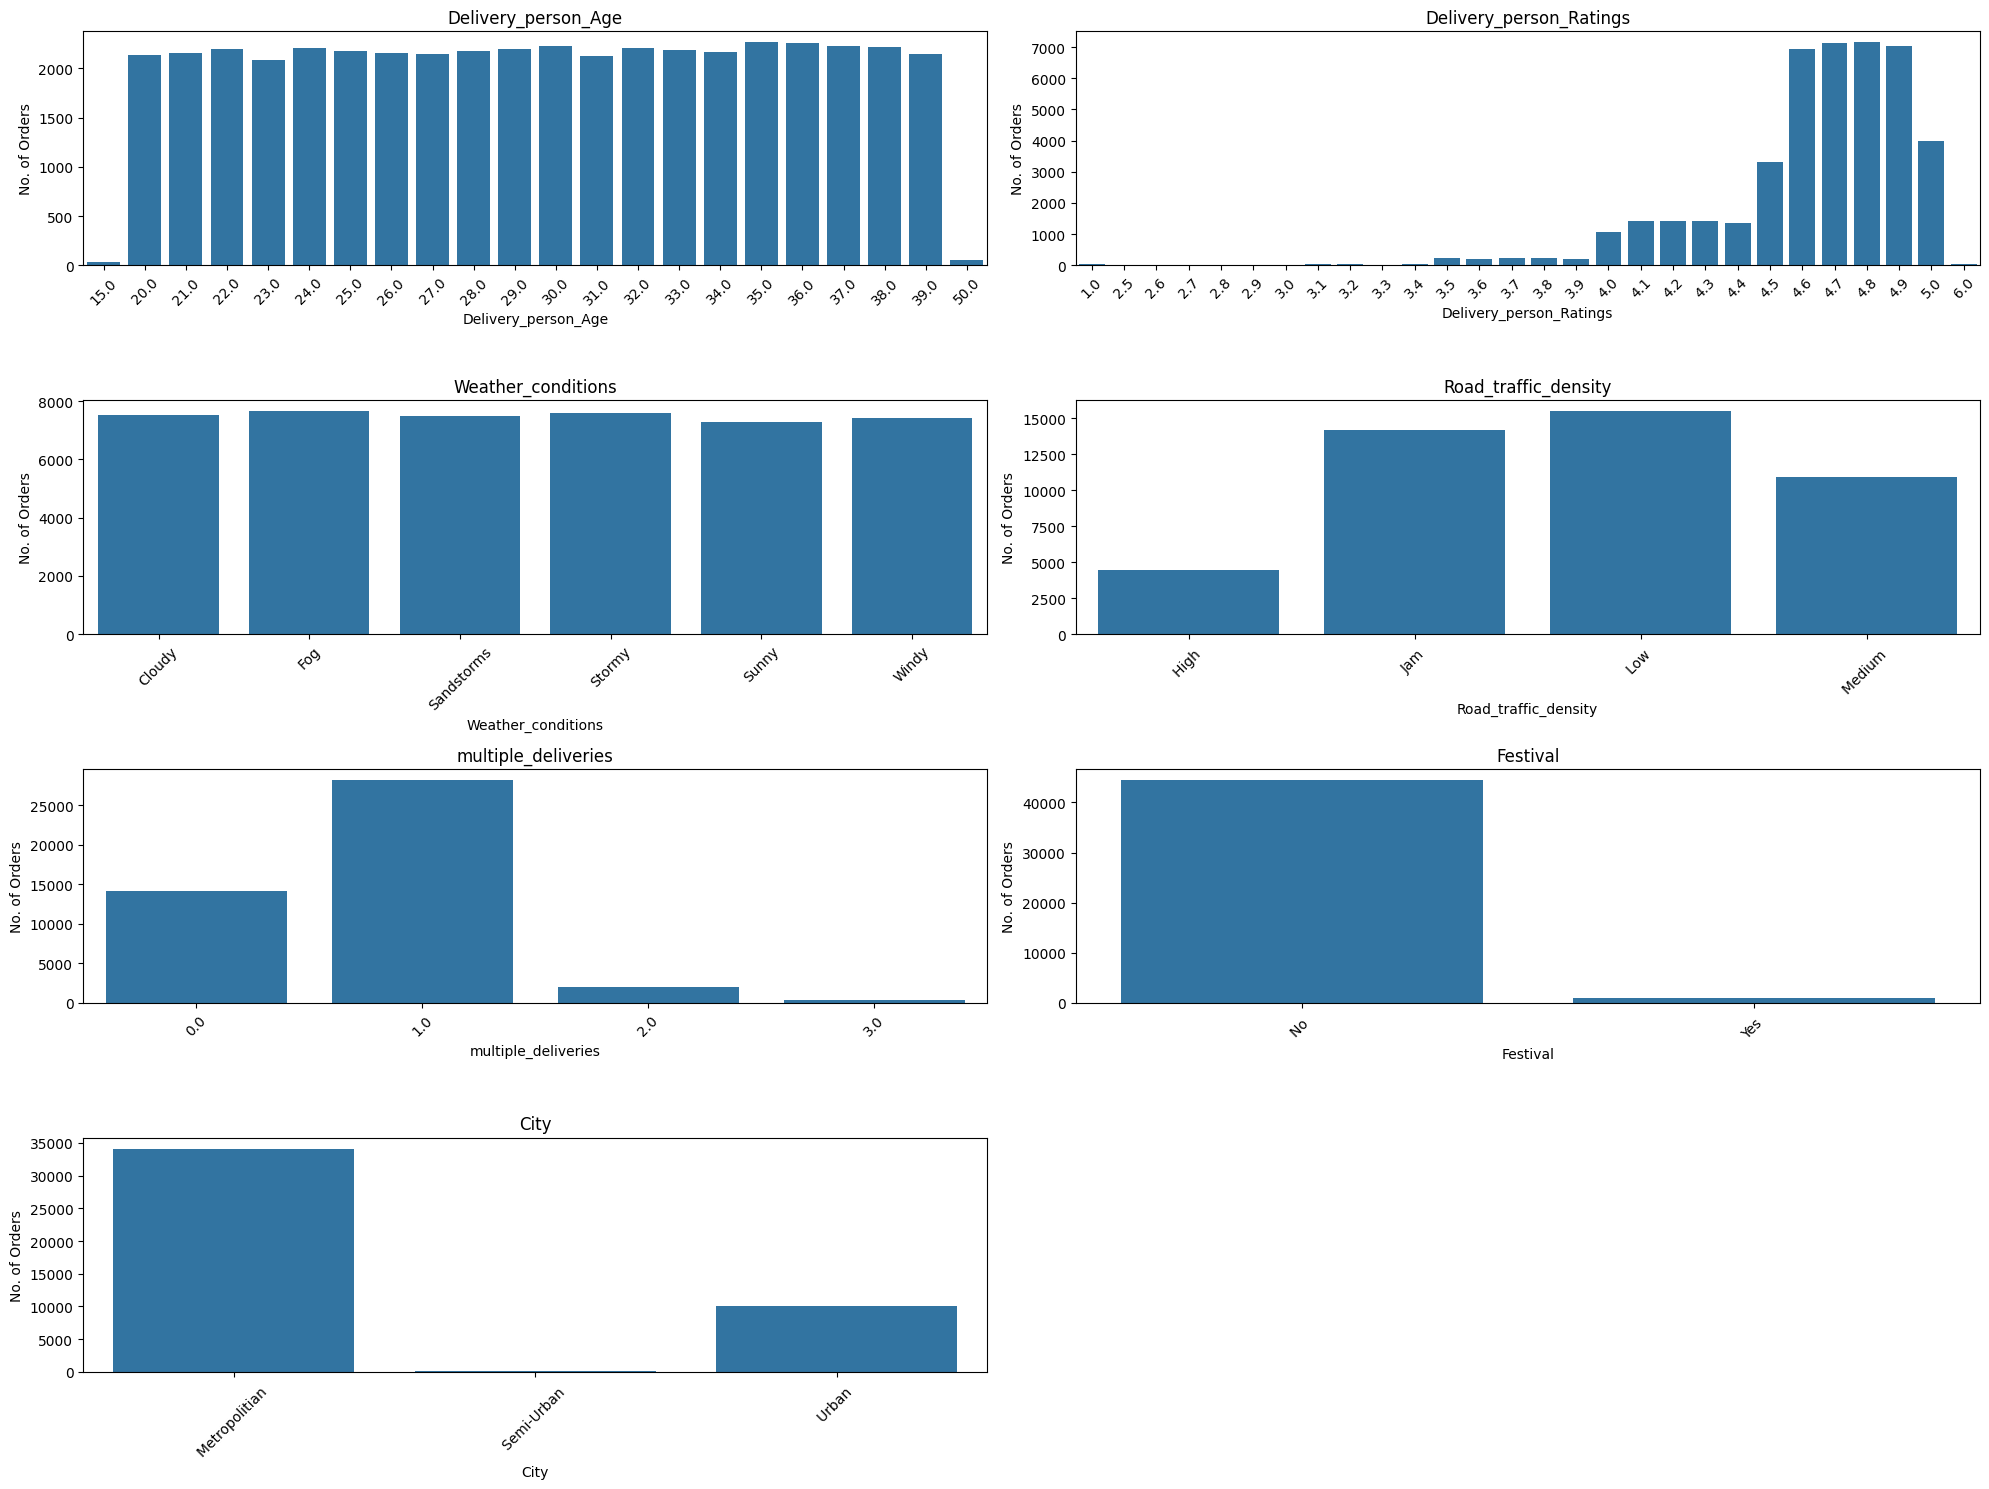

In [89]:
#Using the seaborn and matplotlib.pyplot libraries, let's investigate columns with null values.

cols = ['Delivery_person_Age','Delivery_person_Ratings','Weather_conditions','Road_traffic_density','multiple_deliveries','Festival','City']

# Calculate the number of subplots needed
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

# Create a subplot grid with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

# Iterate through each column and create countplots
for i, column_name in enumerate(cols):
    # Calculate the row and column indices for the current subplot
    row = i // 2
    col = i % 2

    # Get the current axis
    ax = axes[row, col]
    # Create a countplot for the current column
    sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().sort_index().index, ax=ax)

     # Set labels and title for the subplot
    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# If the number of plots is odd, remove the empty subplot in the last row and column
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()     # Adjust layout for better spacing
plt.show()             # Display the plot

In [90]:
# Function to handle null values in the given DataFrame. numpy library has used for this function

def handle_null_values(df_null):

     # Fill null values in 'Delivery_person_Age' with a random choice from available values
    df_null['Delivery_person_Age'].fillna(np.random.choice(df_null['Delivery_person_Age']), inplace=True)
    df_null['Weather_conditions'].fillna(np.random.choice(df_null['Weather_conditions']), inplace=True)
    df_null['City'].fillna(df_null['City'].mode()[0], inplace=True)
    df_null['Festival'].fillna(df_null['Festival'].mode()[0], inplace=True)
    df_null['multiple_deliveries'].fillna(df_null['multiple_deliveries'].mode()[0], inplace=True)
    df_null['Road_traffic_density'].fillna(df_null['Road_traffic_density'].mode()[0], inplace=True)
    df_null['Delivery_person_Ratings'].fillna(df_null['Delivery_person_Ratings'].median(), inplace=True)

handle_null_values(df)
df.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Post_office_latitude           0
Post_office_longitude          0
Delivery_location_latitude     0
Delivery_location_longitude    0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(hour)               0
City_code                      0
dtype: int64

# Feature Engineering

In [91]:
#Calculate distance between restaurant location & delivery location. ("geodesic" library hasbeenusedfor this function) )
def calculate_distance(data):
    data['distance']=np.zeros(len(data))
    post_office_coordinates=data[['Post_office_latitude','Post_office_longitude']].to_numpy()
    delivery_location_coordinates=data[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    data['distance'] = np.array([geodesic(postOffice, delivery) for postOffice, delivery in zip(post_office_coordinates, delivery_location_coordinates)])
    data['distance']= data['distance'].astype("str").str.extract('(\d+)').astype("int64")

calculate_distance(df)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Post_office_latitude,Post_office_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(hour),City_code,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,motorcycle,0.0,No,Urban,24,INDO,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,scooter,1.0,No,Metropolitian,33,BANG,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,motorcycle,1.0,No,Urban,26,BANG,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,motorcycle,1.0,No,Metropolitian,21,COIMB,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,scooter,1.0,No,Metropolitian,30,CHEN,6


In [92]:
#'sklearn.preprocessing' library has been used for this function

def label_encoding(data):
    categorical_columns = data.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    data[categorical_columns] = data[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(df)
df.head()

#label_encoding function was used to convert categorical data into numerical data.
#There were 3 columns with categorical data.(Type_of_vehicle,Weather_conditions,Road_traffic_density)

,Delivery_person_Age,Delivery_person_Ratings,Post_office_latitude,Post_office_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(hour),City_code,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,2,0.0,0,2,24,10,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,1.0,0,0,33,3,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,2,1.0,0,2,26,3,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,4,3,0,2,1.0,0,0,21,6,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,0,0,1,3,1.0,0,0,30,5,6


# Train test split

In [93]:
#Split features & label
X = df.drop('Time_taken(hour)', axis=1)  # Features
y = df['Time_taken(hour)']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36474, 15)
(36474,)
(9119, 15)
(9119,)



# Standardization/ Feature  scaling

In [94]:
#feature scaling has been done  using standardization with StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)


#Feature scaling is a crucial preprocessing step in machine learning pipelines to ensure that features are on a similar scale.
#This is important for algorithms that are sensitive to the scale of input features, such as gradient descent-based algorithms (e.g., linear regression, logistic regression) and distance-based algorithms (e.g., K-nearest neighbors, support vector machines).

#Stadarlization :  This method rescales features so that they have a mean of 0 and a standard deviation of 1.



# Cross Validation

In [95]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Find the best model
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    # xgb.XGBRegressor(),
]

param_grid = [
    {},
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [100, 200, 300]},

]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

LinearRegression:
Best parameters: {}
Best R2 score: 0.4170951000494341

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.7243231355790323

RandomForestRegressor:
Best parameters: {'n_estimators': 300}
Best R2 score: 0.8079713336267054



# Model Building

In [96]:
# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=300, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Initialize Random Forest regressor
# rf_regressor = RandomForestRegressor(random_state=42)

# # Perform grid search with cross-validation
# grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, cv=5, scoring='r2')

# # Fit the grid search to the training data
# grid_search_rf.fit(X_train, y_train)

# # Print the best parameters and best R2 score
# print("Random Forest Regression:")
# print("Best parameters:", grid_search_rf.best_params_)
# print("Best R2 score:", grid_search_rf.best_score_)


RandomForestRegressor(n_estimators=300, random_state=42)

# **Feature Importances**

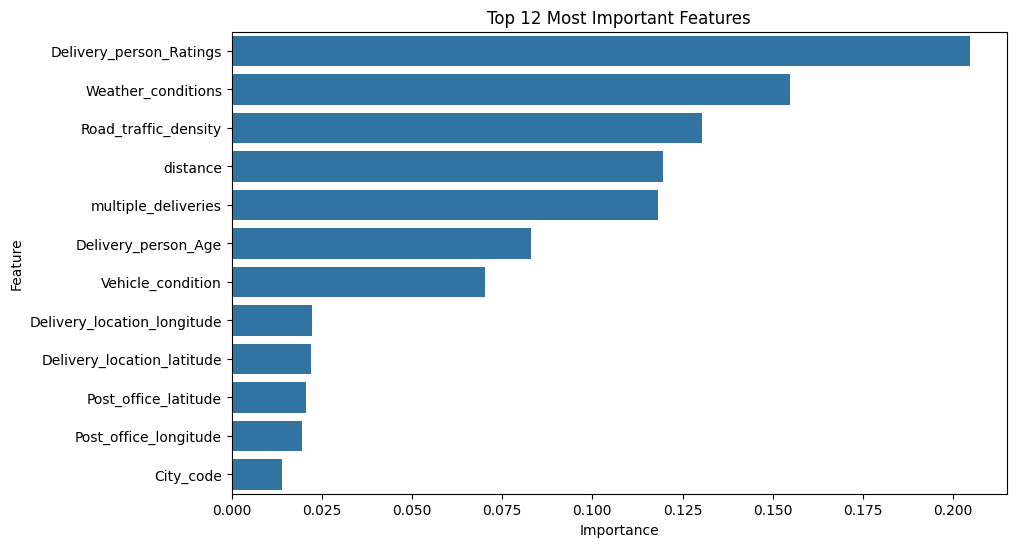

Top Features : ['Delivery_person_Ratings', 'Weather_conditions', 'Road_traffic_density', 'distance', 'multiple_deliveries', 'Delivery_person_Age', 'Vehicle_condition', 'Delivery_location_longitude', 'Delivery_location_latitude', 'Post_office_latitude', 'Post_office_longitude', 'City_code']


In [97]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top n features
top_n = 12  # Select the number of top features to plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
plt.title(f'Top {top_n} Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Select top features
top_features = feature_importance_df.head(top_n)['Feature'].tolist()
print("Top Features : " + str(top_features))



# Create a boolean mask to select top features
feature_mask = X.columns.isin(top_features)

# Remove less important features from the dataset
X_train_selected = X_train[:, feature_mask]
X_test_selected = X_test[:, feature_mask]


# Model Evaluation

In [98]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics

print("Mean Absolute Error (MAE):", round(mae, 2))
# The MAE represents the average absolute difference between the actual and predicted values.
# It measures the average magnitude of errors without considering their direction.
# Lower MAE values indicate better accuracy.

print("Mean Squared Error (MSE):", round(mse, 2))
# The MSE represents the average squared difference between the actual and predicted values.
# It penalizes larger errors more heavily than MAE.
# Lower MSE values indicate better accuracy.

print("Root Mean Squared Error (RMSE):", round(rmse, 2))
# The RMSE is the square root of MSE and provides a more interpretable scale.
# It is in the same units as the target variable.
# Lower RMSE values indicate better accuracy.

print("R-squared (R2) Score:", round(r2, 2))
# The R2 score represents the proportion of the variance in the target variable that is predictable from the features.
# It ranges from 0 to 1, with 1 indicating perfect predictions and 0 indicating no predictive power.
# Higher R2 values indicate better accuracy.

Mean Absolute Error (MAE): 3.23
Mean Squared Error (MSE): 16.7
Root Mean Squared Error (RMSE): 4.09
R-squared (R2) Score: 0.81







# Residual Analysis


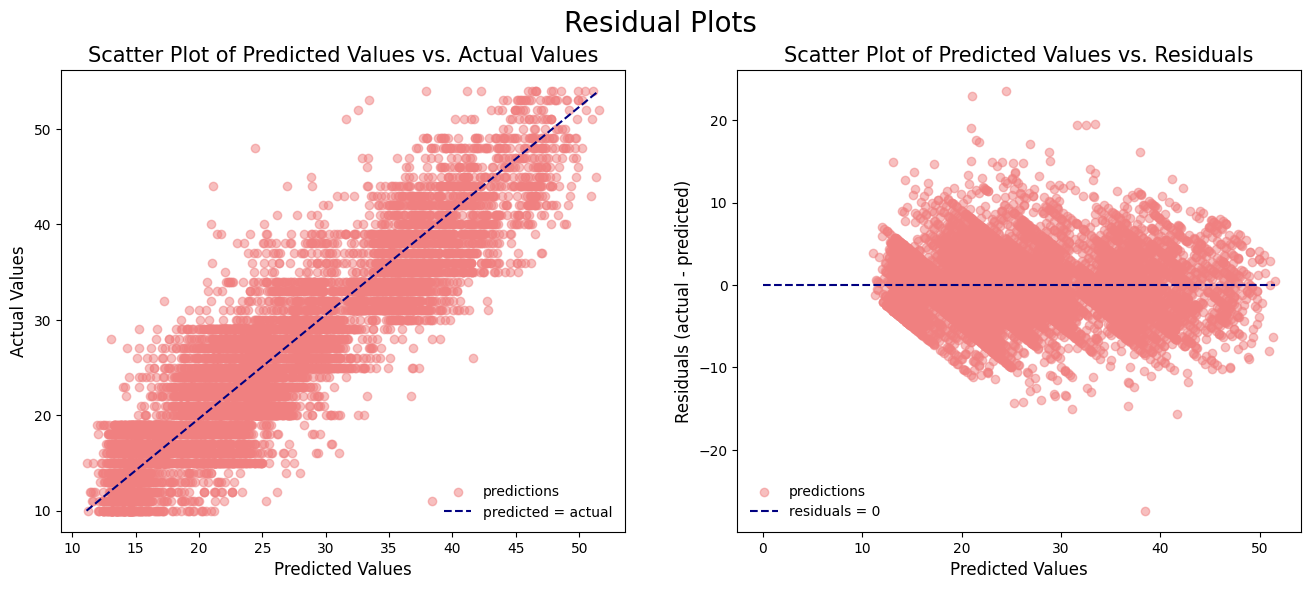

In [99]:
#Residual plots


import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create a figure with two subplots (1 row, 2 columns) for side-by-side visualization
fig, ax = plt.subplots(1,2,figsize=(16,6))

# Scatter plot of predicted values vs. actual values
ax[0].scatter(x=y_pred, y=y_test, alpha=0.5, color="lightcoral", label="predictions")
ax[0].plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], ls="dashed", color="navy", label="predicted = actual")
ax[0].legend(loc="lower right", frameon=False)

# Set labels and title for the first subplot
ax[0].set_xlabel("Predicted Values", fontsize=12)
ax[0].set_ylabel("Actual Values", fontsize=12)
ax[0].set_title("Scatter Plot of Predicted Values vs. Actual Values", fontsize=15)
ax[0].grid(visible=False)


residuals = y_test - y_pred

# Scatter plot of predicted values vs. residuals
ax[1].scatter(x=y_pred, y=residuals, alpha=0.5, color="lightcoral", label="predictions")
ax[1].plot([0, max(y_pred)], [0,0], ls="dashed", color="navy", label="residuals = 0")
ax[1].legend(loc="lower left", frameon=False)

# Set labels and title for the second subplot
ax[1].set_xlabel("Predicted Values", fontsize=12)
ax[1].set_ylabel("Residuals (actual - predicted)", fontsize=12)
ax[1].set_title("Scatter Plot of Predicted Values vs. Residuals", fontsize=15)
ax[1].grid(visible=False)

# Set a main title for the entire figure
fig.suptitle("Residual Plots", fontsize=20)
plt.show()


#Two scatter plotters have been created to visualize the performance of a predictive model.

#First plot (Predicted vs Actual Values): The first plot is a scatter plot of predicted values (y_pred) versus actual values (y_test).
#This plot is useful to see how well the model’s predictions match the actual values.

#Second plot (Predicted Values vs Residuals): The second plot is a scatter plot of predicted values versus residuals
#(the difference between actual and predicted values). This plot is useful to check if the residuals are randomly distributed around zero,
#which is an assumption in many models. The dashed line at zero represents no error.

In [100]:
import numpy as np

def detect_outliers_iqr(data, threshold=1.5):
    """
    Detect outliers using the Interquartile Range (IQR) method.

    Parameters:
        data (array-like): The input data for outlier detection.
        threshold (float): The threshold value to determine outliers.
            Default is 1.5.

    Returns:
        array-like: A boolean array indicating whether each data point is an outlier.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Detect outliers
    outliers = (data < lower_bound) | (data > upper_bound)

    return outliers

# Example usage:
# Assuming 'residuals' is the array of residuals from your regression model
# Adjust 'threshold' as needed based on the specific characteristics of your data

residuals = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100])  # Example array of residuals
outliers = detect_outliers_iqr(residuals)
outlier_indices = np.where(outliers)[0]
print("Indices of outliers:", outlier_indices)


Indices of outliers: [10]


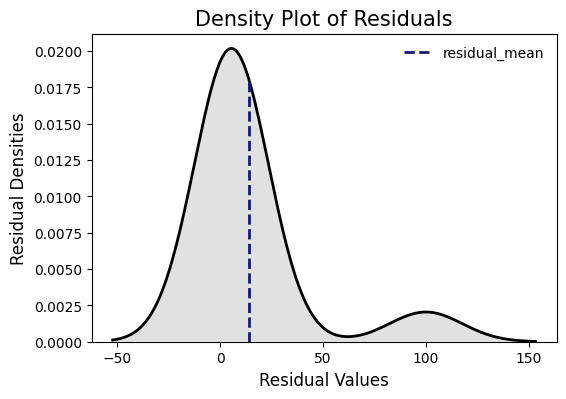

In [101]:
fig, ax = plt.subplots(figsize=(6,4))

ax = sns.kdeplot(residuals, shade=False, color="black", linewidth=2)

kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

height = np.interp(np.mean(residuals), xs, ys)
ax.vlines(np.mean(residuals), 0, height, color='midnightblue', ls='dashed', lw=2, label="residual_mean")

ax.fill_between(xs, 0, ys, facecolor='dimgrey', alpha=0.2)

ax.legend(loc="best", frameon=False)

ax.set_xlabel("Residual Values", fontsize=12)
ax.set_ylabel("Residual Densities", fontsize=12)
ax.set_title("Density Plot of Residuals", fontsize=15)
ax.grid(visible=False)
plt.show()